<a href="https://colab.research.google.com/github/GigiQR99/CV-Class3-Streamlit/blob/main/nlp_class_vectorization_wordcloud_w2hw1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NLP MODULE 1 Homework 1 & 2**

#### Raquel Quintanilla



## Activity 2.01: Extracting Top Keywords from the News Article

In this activity, you will extract the most frequently occurring keywords from a sample news article using Python and the Natural Language Toolkit (NLTK).

### Prerequisites

- Basic understanding of Python programming.
- An environment to run Python code (like Jupyter Notebook or Google Colab).

### Data

The news article used in this activity is available at the following link: [news_article.txt](https://github.com/fenago/natural-language-processing-workshop/blob/master/Lab02/data/news_article.txt).

### Steps to Follow

1. **Set Up Your Environment**:
   - Open Jupyter Notebook or Google Colab.
   - Ensure Python is installed along with NLTK. Install NLTK if not already installed using `!pip install nltk`.

2. **Import Necessary Libraries**:
   - Import `nltk` and other necessary Python libraries.

3. **Define Helper Functions**:
   - Create functions to load the text file, convert text to lowercase, tokenize the text, remove stop words, perform stemming, and calculate word frequencies.

4. **Load the News Article**:
   - Use Python's file handling methods to load `news_article.txt` into a string.

5. **Preprocess the Text**:
   - Convert the text to lowercase.
   - Tokenize the text using a whitespace tokenizer.
   - Remove stop words from the tokens.
   - Perform stemming on the remaining tokens.

6. **Calculate Word Frequencies**:
   - Count the frequency of each word after stemming.
   - Display the most frequent keywords.

### Challenge for Students

Now that you've learned how to extract keywords from a news article, challenge yourself by applying these techniques to a different dataset. Here's what you can do:

- **Find a Unique Dataset**: Select a text dataset of your interest. This could be another news article, a blog post, or any textual data.
- **Implement the Keyword Extraction Process**: Apply the steps you've learned in this activity to your dataset. This includes text preprocessing, tokenization, stop word removal, stemming, and frequency analysis.
- **Analyze Your Results**: Look at the most frequent keywords in your dataset. Do they give you insights into the main themes or topics of the text?

**Contextualize Your Learning**: Reflect on how this process could be useful in real-world applications like search engine optimization, content analysis, or summarizing information.


### **ACTIVITY 2.01:** Solution

In [2]:
# ============================================
# STEP 1 SET UP ENVIROMENT Install NLTK
# ============================================

# Install NLTK library
!pip install nltk


### **STEP 2:** import NLTK libraries  & set up enviroment

In [3]:
# ==============================================================
# STEP 2 Import necessary libraries for NLP and text processing
# ==============================================================

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize  #Tokenization: split text --> words/sentences
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer  #Reduce words to root form: I will use ONLY LEMMATIZATION
from nltk.probability import FreqDist   # Counts how many times ea word appears in your text, creates a frequency distribution
from collections import Counter # word counter
import re
import string

# Download required NLTK data resources
print("Downloading NLTK resources...")
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

print("\n✓ All libraries imported and NLTK data downloaded successfully!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.



✓ All libraries imported and NLTK data downloaded successfully!


In [4]:
# Clone the GitHub repository
!git clone https://github.com/GigiQR99/nlp_class_labs.git

# Verify the clone was successful
!ls -la


Cloning into 'nlp_class_labs'...
remote: Enumerating objects: 945, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 945 (delta 79), reused 89 (delta 34), pack-reused 766 (from 1)
Receiving objects: 100% (945/945), 183.71 MiB | 26.52 MiB/s, done.
Resolving deltas: 100% (301/301), done.
Updating files: 100% (422/422), done.
total 20
drwxr-xr-x  1 root root 4096 Nov  6 18:23 .
drwxr-xr-x  1 root root 4096 Nov  6 17:44 ..
drwxr-xr-x  4 root root 4096 Nov  5 14:33 .config
drwxr-xr-x 13 root root 4096 Nov  6 18:23 nlp_class_labs
drwxr-xr-x  1 root root 4096 Nov  5 14:33 sample_data


### **STEP 3: (fetch the dataset)** - Load the News Article:

Use Python's file handling methods to load `news_article.txt` into a string.
File is in github

In [11]:
# ============================================================
# STEP 3: Define Helper Functions for TEXT PROCESSING
# ============================================================

#========= Define file path and read the file ================

# File path (news_article.text):
file_path = '/content/nlp_class_labs/Lab02/data/news_article.txt'

def load_text(file_path):
    """Reads a text file and provides a concise summary preview."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        print(f"✅ Text loaded successfully from: {file_path}")
        print(f"Characters: {len(text)} | Lines: {len(text.splitlines())}")
        print(f"🔹 Preview:\n{text[:300]}...")
        return text

    except FileNotFoundError:
        print(f"❌ Error: File not found at {file_path}")
        return None

# CALL THE FUNCTION
text = load_text(file_path)


✅ Text loaded successfully from: /content/nlp_class_labs/Lab02/data/news_article.txt
Characters: 1079 | Lines: 14
🔹 Preview:
Ever since the populist Law and Justice (pis) party took power in 2015, Adam Bodnar, Poland’s
 human-rights ombudsman, has been warning against its relentless efforts to get control of the
 courts. To illustrate the danger, he uses an expression from communist times: lex telefonica.
 In the Polish P...


In [ ]:
# ============================================================
# STEP 4: Define Helper Functions for TEXT PROCESSING
# ============================================================

#============= Define file path and read the file ============

def load_text(file_path):
    """Reads a text file and provides a concise summary preview."""  # Note to myself: remember what this fxn does
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Print summary and preview
    print(f"✅ Text loaded successfully from: {file_path}")
    print(f"Characters: {len(text)} | Lines: {len(text.splitlines())}")
    print(f"🔹 Preview:\n{text[:300]}...")

    return text

# Example call
text = load_text(file_path)


In [ ]:
# =======================================================================
# STEP 1: upload news_article.txt mount Google Drive
# =======================================================================

#from google.colab import drive
#drive.mount('/content/drive')

# .TXT file path:
#file_path = '/content/drive/MyDrive/news_article.txt'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **STEP 4:** Define Helper Functions for Text Processing

###**STEP 4: Preprocess the Text:**

* Convert the text to lowercase.
* Tokenize the text using a whitespace tokenizer.
* Remove stop words from the tokens.
* Perform stemming on the remaining tokens.

In [12]:
#=============  1️⃣ CONVERT TO LOWERCASE =============

def to_lowercase(text):
    """Converts all characters to lowercase"""
    lowered = text.lower()
    print("\n🔹 Lowercased preview:\n", lowered[:300], "...")
    return lowered

# Call the lowercase function and display output
# Store the lowercased version in a new variable called "lower_text"
lower_text = to_lowercase(text)


🔹 Lowercased preview:
 ever since the populist law and justice (pis) party took power in 2015, adam bodnar, poland’s
 human-rights ombudsman, has been warning against its relentless efforts to get control of the
 courts. to illustrate the danger, he uses an expression from communist times: lex telefonica.
 in the polish p ...


In [13]:
#================= 2️⃣ TOKENIZE TEXT ====================

def tokenize_text(text):
    """Splits text into individual words"""
    tokens = word_tokenize(text)
    print("\n🔹 Sample tokens:\n", tokens[:25], "...")
    return tokens

# Call the tokenize function and display output
# Store the token list in the variable tokens for later use:
tokens = tokenize_text(lower_text)


🔹 Sample tokens:
 ['ever', 'since', 'the', 'populist', 'law', 'and', 'justice', '(', 'pis', ')', 'party', 'took', 'power', 'in', '2015', ',', 'adam', 'bodnar', ',', 'poland', '’', 's', 'human-rights', 'ombudsman', ','] ...


In [14]:
#==================== 3️⃣ Remove stop words and punctuation ====================
def remove_stopwords(tokens):
    """Removes English stop words and punctuation"""
    stop_words = set(stopwords.words('english'))
    clean_tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    print("\n🔹 Tokens after removing stopwords/punctuation:\n", clean_tokens[:25], "...")    # Show only 25 tokens
    return clean_tokens

# Call the remove_stopwords function and display its output
# And save the cleaned tokens in the variable clean_tokens for later steps:
clean_tokens = remove_stopwords(tokens)



🔹 Tokens after removing stopwords/punctuation:
 ['ever', 'since', 'populist', 'law', 'justice', 'pis', 'party', 'took', 'power', 'adam', 'bodnar', 'poland', 'ombudsman', 'warning', 'relentless', 'efforts', 'get', 'control', 'courts', 'illustrate', 'danger', 'uses', 'expression', 'communist', 'times'] ...


In [15]:
#==================== 4️⃣ LEMMATIZING WORDS ====================
'''I use lemmatization instead of stemming, there are some similar words that rather cactch in its context'''

def lemmatize_tokens(tokens):
    """Converts each word to its lemma (base form)"""
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    print("\n🔹 Sample lemmatized tokens:\n", lemmas[:25], "...")   # Show only 25 tokens
    return lemmas

# Call the lemmatize_tokens function and display output
# Store clean tokens in the variable lemmas
lemmas = lemmatize_tokens(clean_tokens)



🔹 Sample lemmatized tokens:
 ['ever', 'since', 'populist', 'law', 'justice', 'pi', 'party', 'took', 'power', 'adam', 'bodnar', 'poland', 'ombudsman', 'warning', 'relentless', 'effort', 'get', 'control', 'court', 'illustrate', 'danger', 'us', 'expression', 'communist', 'time'] ...


###**STEP 6: Calculate Word Frequencies:**

* Count the frequency of each word after stemming.
* Display the most frequent keywords.

In [18]:
#==================================
# CALCULATE WORDS FREQUENCIES
#==================================

def get_word_frequencies(tokens):
    """Calculates word frequency distribution"""
    freq_dist = FreqDist(tokens)
    print("\n🔹 Top 10 most frequent words:")
    print("=============================")
    for word, freq in freq_dist.most_common(10):
        print(f"   {word}: {freq}")
    return freq_dist

# Call function and display its output
freq_dist = get_word_frequencies(lemmas)



🔹 Top 10 most frequent words:
   law: 3
   justice: 3
   poland: 3
   judge: 3
   european: 3
   pi: 2
   party: 2
   took: 2
   bodnar: 2
   control: 2


#### **6.1: DATA VISUALIZATION OF TOP 10 MOST FREQUENT WORDS**


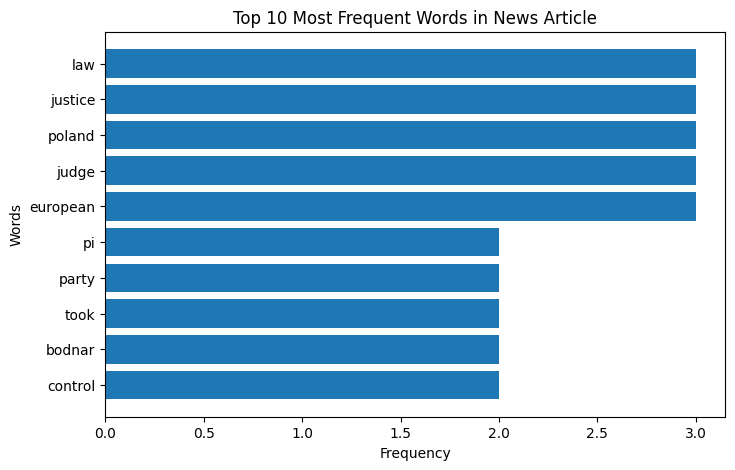

In [19]:
import matplotlib.pyplot as plt

# Get the 10 most common words
top_words = freq_dist.most_common(10)
words = [w for w, _ in top_words]
counts = [c for _, c in top_words]

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(words, counts)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words in News Article')
plt.gca().invert_yaxis()  # so the most frequent word appears at the top
plt.show()


# for the news_article.txt - just create a text file and put this into the contents:

Ever since the populist Law and Justice (pis) party took power in 2015, Adam Bodnar, Poland’s
 human-rights ombudsman, has been warning against its relentless efforts to get control of the
 courts. To illustrate the danger, he uses an expression from communist times: lex telefonica.
 In the Polish People’s Republic, verdicts were routinely dictated by a phone call from an
 apparatchik at party headquarters. Today’s government has more subtle techniques,
 but the goal is the same, Mr Bodnar says: “If a judge has a case on his desk with some
 political importance, he should be afraid.”

The European Commission is worried, too. It accuses pis of violating Poland’s commitments
to the rule of law under the European Union’s founding treaty. In 2017 the commission took
Poland to the European Court of Justice (ecj) over laws that gave politicians control over
appointing judges. (For example, they lowered judges’ retirement age while letting the justice
 minister pick whom to exempt.) The ecj ruled against the Poles, who had in the meantime
 scrapped some of the measures.

## Activity 2.02: Text Visualization

In this activity, you will create a word cloud for the 50 most frequent words in a dataset. The dataset consists of random sentences that need to be cleaned and analyzed to identify frequently occurring words.

### Prerequisites

- Basic understanding of Python programming.
- Familiarity with text processing and visualization libraries in Python.

### Data

The dataset used in this activity is available at the following link: [text_corpus.txt](https://github.com/fenago/natural-language-processing-workshop/blob/master/Lab02/data/text_corpus.txt
).

### Steps to Follow

1. **Import Necessary Libraries**:
   - Import libraries required for data fetching, text processing, and visualization (like `pandas`, `nltk`, `matplotlib`, `wordcloud`, etc.).

2. **Fetch the Dataset**:
   - Retrieve the `text_corpus.txt` file and load its contents.

3. **Preprocess the Text**:
   - Perform text cleaning to remove unwanted characters and formats.
   - Tokenize the text.
   - Apply lemmatization to convert words to their base form.

4. **Identify Top 50 Words**:
   - Calculate the frequency of each word in the cleaned dataset.
   - Create a set of the top 50 most frequent words along with their frequencies.

5. **Create a Word Cloud**:
   - Use the word cloud library to visualize the top 50 words.
   - Customize the word cloud's appearance as needed.

6. **Analyze the Word Cloud**:
   - Compare the word cloud with the calculated word frequencies.
   - Justify the representation of words in the word cloud based on their frequencies.

### Challenge for Students

Now that you have created a word cloud for a given dataset, try extending your skills with these tasks:

- **Use a Different Dataset**: Find another text dataset that interests you. It could be a collection of social media posts, reviews, or any other textual content.
- **Apply Enhanced Text Processing**: Experiment with different preprocessing techniques like stop word removal, n-grams, or POS tagging.
- **Visualize Your Findings**: Create a word cloud for your chosen dataset. How does the word cloud reflect the key themes or sentiments in the data?
- **Draw Insights**: Reflect on how word clouds can aid in quick data analysis, highlighting key areas for deeper exploration.

**Explore Further**: Consider how word clouds can be used in areas like marketing analysis, sentiment analysis, or summarizing large volumes of text.


In [20]:
# =======================================================================
# STEP 1: upload text_corpus.txt mount Google Drive
# =======================================================================


# Example path — adjust to where your file actually is
file_path2 = '/content/nlp_class_labs/Lab02/data/text_corpus.txt'

In [21]:

# =========================
# STEP 2: Import Libraries
# =========================

# Install NLTK and WordCloud if not already installed
!pip install nltk wordcloud

# 🔹 Import core libraries
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk import corpus
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
print("📦 Downloading NLTK resources...")
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

print("✅ Libraries imported and NLTK data ready!\n")


📦 Downloading NLTK resources...
✅ Libraries imported and NLTK data ready!



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# ============================================================
# STEP 2.1: Fetch and Load Dataset
# ============================================================

# Specify the file path to your "text_corpus.text"
file_path2 = '/content/nlp_class_labs/Lab02/data/text_corpus.txt'

# Read the entire content of the file
with open(file_path2, 'r', encoding='utf-8') as f:
    corpus_text = f.read()

# Display preview of the text
print("✅ Text corpus loaded successfully!")
print("\n🔹 Preview of corpus text:\n")
print(corpus_text[:500], "...")


✅ Text corpus loaded successfully!

🔹 Preview of corpus text:

New Zealand players Jesse Tashkoff and Joey Field won hearts on Wednesday after they helped carry injured West Indies batsman Kirk McKenzie off the field during their U-19 World Cup quarterfinal.

McKenzie was suffering from cramps on his leg and was forced to retire hurt on 99, but courageously decided to return to face the final 14 deliveries of the innings after West Indies had lost their ninth wicket.

After struggling to hobble back to the middle, however, he was dismissed first ball -- sti ...


### 🧩 **STEP 3:** Preprocess the Text

In [23]:
# ============================================================
# STEP 3: Preprocess the Text
# ============================================================

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#======= 1️⃣ CLEAN TEXT (remove special chars, numbers, etc.)============
def clean_text(text):
    """Remove unwanted characters, digits, and extra spaces."""
    cleaned = re.sub(r'[^A-Za-z\s]', '', text)  # keep only letters and spaces
    cleaned = re.sub(r'\s+', ' ', cleaned)      # replace multiple spaces with one
    cleaned = cleaned.strip().lower()            # remove leading/trailing spaces & lowercase
    print("✅ Text cleaned successfully!")
    print("\n🔹 Preview of cleaned text:\n", cleaned[:300], "...")
    return cleaned

# Clean the text
cleaned_text = clean_text(corpus_text)


✅ Text cleaned successfully!

🔹 Preview of cleaned text:
 new zealand players jesse tashkoff and joey field won hearts on wednesday after they helped carry injured west indies batsman kirk mckenzie off the field during their u world cup quarterfinal mckenzie was suffering from cramps on his leg and was forced to retire hurt on but courageously decided to r ...


In [24]:

# ============= 2️⃣ TOKENIZE TEXT ===================
def tokenize_text(text):
    """Split text into words (tokens)."""
    tokens = word_tokenize(text)
    print("\n✅ Tokenization complete!")
    print("🔹 Sample tokens:\n", tokens[:25], "...")
    return tokens
# Tokenize
tokens = tokenize_text(cleaned_text)



✅ Tokenization complete!
🔹 Sample tokens:
 ['new', 'zealand', 'players', 'jesse', 'tashkoff', 'and', 'joey', 'field', 'won', 'hearts', 'on', 'wednesday', 'after', 'they', 'helped', 'carry', 'injured', 'west', 'indies', 'batsman', 'kirk', 'mckenzie', 'off', 'the', 'field'] ...


In [25]:

#=================== 3️⃣ REMOVE STOPWORDS ==================
def remove_stopwords(tokens):
    """Remove common English stopwords."""
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [t for t in tokens if t not in stop_words]
    print("\n✅ Stopwords removed!")
    print("🔹 Sample tokens after cleaning:\n", filtered_tokens[:25], "...")
    return filtered_tokens

# Remove stopwords
filtered_tokens = remove_stopwords(tokens)



✅ Stopwords removed!
🔹 Sample tokens after cleaning:
 ['new', 'zealand', 'players', 'jesse', 'tashkoff', 'joey', 'field', 'hearts', 'wednesday', 'helped', 'carry', 'injured', 'west', 'indies', 'batsman', 'kirk', 'mckenzie', 'field', 'u', 'world', 'cup', 'quarterfinal', 'mckenzie', 'suffering', 'cramps'] ...


In [26]:

#=================== 4️⃣ Lemmatization ===================

def lemmatize_tokens(tokens):
    """Convert tokens to their base form (lemmas)."""
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    print("\n✅ Lemmatization complete!")
    print("🔹 Sample lemmas:\n", lemmas[:25], "...")
    return lemmas


# Lemmatize
lemmas = lemmatize_tokens(filtered_tokens)




✅ Lemmatization complete!
🔹 Sample lemmas:
 ['new', 'zealand', 'player', 'jesse', 'tashkoff', 'joey', 'field', 'heart', 'wednesday', 'helped', 'carry', 'injured', 'west', 'indie', 'batsman', 'kirk', 'mckenzie', 'field', 'u', 'world', 'cup', 'quarterfinal', 'mckenzie', 'suffering', 'cramp'] ...


###  **🧩 Step 4**: Identify Top 50 Words

In [29]:
# ============================================================
# STEP 4: Identify Top 50 Most Frequent Words
# ============================================================

from nltk.probability import FreqDist

# 1️⃣ Calculate frequency distribution
freq_dist = FreqDist(lemmas)

# 2️⃣ Get the 50 most common words and their counts
top_50 = freq_dist.most_common(50)

# 3️⃣ Display results
print("✅ Top 50 Most Frequent Words:")
print("=============================")
for word, count in top_50:
    print(f"{word:<15} {count}")


✅ Top 50 Most Frequent Words:
field           7
new             5
zealand         5
clarke          4
joey            3
west            3
indie           3
mckenzie        3
wicket          3
spiritofcricket 3
unbeaten        3
player          2
u               2
world           2
cup             2
face            2
final           2
back            2
ball            2
kiwi            2
applauded       2
south           2
africa          2
rohit           2
also            2
good            2
see             2
best            2
game            2
kristian        2
semifinal       2
windies         2
jesse           1
tashkoff        1
heart           1
wednesday       1
helped          1
carry           1
injured         1
batsman         1
kirk            1
quarterfinal    1
suffering       1
cramp           1
leg             1
forced          1
retire          1
hurt            1
courageously    1
decided         1


###  **🧩 Step 5**: Cloud of Words

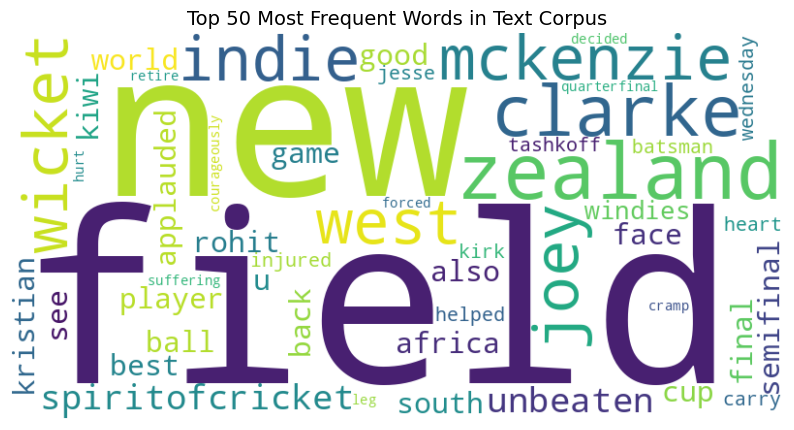

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1️⃣ Generate the word cloud
wordcloud = WordCloud(
    width=800,            # image width
    height=400,            # image height
    background_color='white',
    max_words=50,          # show top 50 words
    colormap='viridis',    # color theme (you can try 'plasma', 'cool', 'inferno', etc.)
    contour_color='steelblue',  # optional border color
    contour_width=2
).generate_from_frequencies(freq_dist)

# 2️⃣ Display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 50 Most Frequent Words in Text Corpus', fontsize=14)
plt.show()

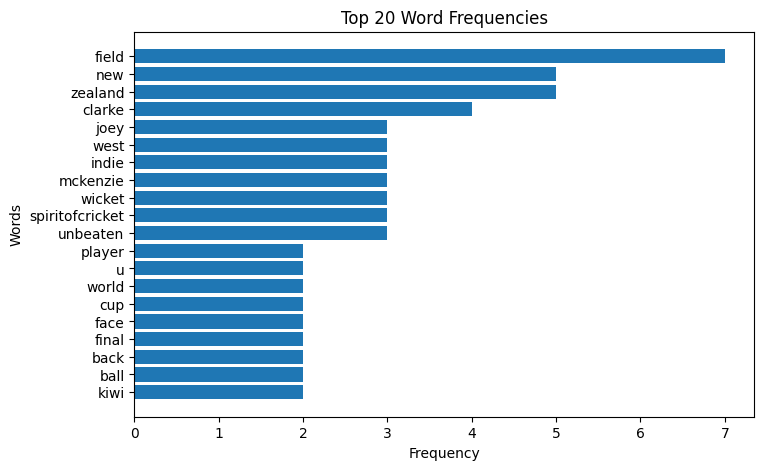

Word  |  Count  |  Relative Weight (count / max_count)
-------------------------------------------------------
field        7       1.00
new          5       0.71
zealand      5       0.71
clarke       4       0.57
joey         3       0.43
west         3       0.43
indie        3       0.43
mckenzie     3       0.43
wicket       3       0.43
spiritofcricket 3       0.43
unbeaten     3       0.43
player       2       0.29
u            2       0.29
world        2       0.29
cup          2       0.29
face         2       0.29
final        2       0.29
back         2       0.29
ball         2       0.29
kiwi         2       0.29
applauded    2       0.29
south        2       0.29
africa       2       0.29
rohit        2       0.29
also         2       0.29
good         2       0.29
see          2       0.29
best         2       0.29
game         2       0.29
kristian     2       0.29
semifinal    2       0.29
windies      2       0.29
jesse        1       0.14
tashkoff     1       0.14
he

In [32]:
# ALREADY IMPORTED :freq_dist, WordCloud, & matplotlib.pyplot


# ---- 1) Prepare comparable subsets ----
top_50 = dict(freq_dist.most_common(50))
top_20 = freq_dist.most_common(20)  # for a readable bar chart

# ---- 2) Show the frequency bar chart (top 20) ----
words = [w for w, _ in top_20]
counts = [c for _, c in top_20]

plt.figure(figsize=(8,5))
plt.barh(words, counts)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Word Frequencies')
plt.gca().invert_yaxis()
plt.show()


# ---- 3) Print a comparison table + justification metric ----
# WordCloud scales word size ~proportionally to supplied frequencies.
# We'll print each word’s raw count and a normalized weight (0–1).
max_count = max(top_50.values())
print("Word  |  Count  |  Relative Weight (count / max_count)")
print("-" * 55)
for w, c in sorted(top_50.items(), key=lambda x: x[1], reverse=True):
    rel = c / max_count
    print(f"{w:<12} {c:<7} {rel:.2f}")


print("- Higher counts => higher relative weight => larger font in the word cloud.")
print("- The bar chart (absolute counts) should match the visual emphasis in the word cloud.")


### **JUSTIFICATION & ANALYSIS**

Word clouds enable rapid pattern recognition by fastly revealing dominant themes without manual text review. In this corpus_text immediately identified **"field," "new," "zealand,"** and **"clarke"** as **central topics**, suggesting the ***text discusses New Zealand cricket and specific players***.

This visual snapshot saves hours compared to traditional coding methods, making word clouds **ideal for preliminary exploration** that guides deeper statistical analysis.

#### **Frequency-Size Correlation**
* The word cloud accurately represents the frequency distribution from the dataset.
* "Field" (7 occurrences, relative wt 1.00) appears as the largest word in the cloud, which correctly reflects it being the most frequent term.
* Similarly, "new" and "zealand" (both 5 occurrences, 0.71 weight) are prominently displayed in large font sizes, maintaining their position as the 2nd-most freq words.

#### **Linear Scaling Validation**
* The word cloud shows linear proportional scaling where font size directly correlates with word frequency. Words with frequency 3 ("clarke," "joey," "west," "indie," "mckenzie," "wicket," "spiritofcricket," "unbeaten") appear in medium-sized fonts, while words with frequency < 3 appear smaller.
*  WordCloud algorithm properly mapped the relative weights (count/max_count) to visual size.

In [ ]:
news_article = '''Ever since the populist Law and Justice (pis) party took power in 2015, Adam Bodnar, Poland’s human-rights ombudsman, has been warning against its relentless efforts to get control of the courts. To illustrate the danger, he uses an expression from communist times: lex telefonica. In the Polish People’s Republic, verdicts were routinely dictated by a phone call from an apparatchik at party headquarters. Today’s government has more subtle techniques, but the goal is the same, Mr Bodnar says: “If a judge has a case on his desk with some political importance, he should be afraid.”

The European Commission is worried, too. It accuses pis of violating Poland’s commitments to the rule of law under the European Union’s founding treaty. In 2017 the commission took Poland to the European Court of Justice (ecj) over laws that gave politicians control over appointing judges. (For example, they lowered judges’ retirement age while letting the justice minister pick whom to exempt.) The ecj ruled against the Poles, who had in the meantime scrapped some of the measures.'''


In [ ]:
news_article

'Ever since the populist Law and Justice (pis) party took power in 2015, Adam Bodnar, Poland’s human-rights ombudsman, has been warning against its relentless efforts to get control of the courts. To illustrate the danger, he uses an expression from communist times: lex telefonica. In the Polish People’s Republic, verdicts were routinely dictated by a phone call from an apparatchik at party headquarters. Today’s government has more subtle techniques, but the goal is the same, Mr Bodnar says: “If a judge has a case on his desk with some political importance, he should be afraid.”\n\nThe European Commission is worried, too. It accuses pis of violating Poland’s commitments to the rule of law under the European Union’s founding treaty. In 2017 the commission took Poland to the European Court of Justice (ecj) over laws that gave politicians control over appointing judges. (For example, they lowered judges’ retirement age while letting the justice minister pick whom to exempt.) The ecj ruled